In [7]:
import pandas as pd

solar_data = pd.read_csv('solarpower.csv')

df

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0
...,...,...
659,2018-10-22,28101.0
660,2018-10-23,28109.0
661,2018-10-24,28115.0
662,2018-10-25,28117.0


In [8]:
solar_data.head()

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


In [14]:
for j,i in enumerate(solar_data['cum_power']):
    if i == -1:
        print (j,i)

45 -1.0
647 -1.0


In [24]:
for j,i in enumerate(solar_data['cum_power']):
    if i == -1:
        solar_data.loc[j,'cum_power'] = (solar_data.iloc[j+1]['cum_power'] + solar_data.iloc[j-1]['cum_power']) /2

In [25]:
for j,i in enumerate(solar_data['cum_power']):
    if i == -1:
        print (j,i)

In [33]:
round(solar_data['cum_power'].mean())

23848

In [34]:
solar_data['day_power']=solar_data['cum_power'].diff()

In [35]:
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       664 non-null    object 
 1   cum_power  664 non-null    float64
 2   day_power  663 non-null    float64
dtypes: float64(2), object(1)
memory usage: 15.7+ KB


In [36]:
solar_data['date']=pd.to_datetime(solar_data['date'])

In [37]:
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       664 non-null    datetime64[ns]
 1   cum_power  664 non-null    float64       
 2   day_power  663 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 15.7 KB


In [38]:
solar_data.head

<bound method NDFrame.head of           date  cum_power  day_power
0   2017-01-01    20111.0        NaN
1   2017-01-02    20112.0        1.0
2   2017-01-03    20115.0        3.0
3   2017-01-04    20117.0        2.0
4   2017-01-05    20119.0        2.0
..         ...        ...        ...
659 2018-10-22    28101.0        6.0
660 2018-10-23    28109.0        8.0
661 2018-10-24    28115.0        6.0
662 2018-10-25    28117.0        2.0
663 2018-10-26    28120.0        3.0

[664 rows x 3 columns]>

In [39]:
solar_data['period']=solar_data['date'].dt.to_period("M")

In [40]:
solar_data

,date,cum_power,day_power,period
0,2017-01-01,20111.0,NaN,2017-01
1,2017-01-02,20112.0,1.0,2017-01
2,2017-01-03,20115.0,3.0,2017-01
3,2017-01-04,20117.0,2.0,2017-01
4,2017-01-05,20119.0,2.0,2017-01
...,...,...,...,...
659,2018-10-22,28101.0,6.0,2018-10
660,2018-10-23,28109.0,8.0,2018-10
661,2018-10-24,28115.0,6.0,2018-10
662,2018-10-25,28117.0,2.0,2018-10


In [44]:
round(solar_data.groupby('period')['day_power'].mean())

period
2017-01     3.0
2017-02     4.0
2017-03    11.0
2017-04    16.0
2017-05    19.0
2017-06    22.0
2017-07    18.0
2017-08    15.0
2017-09    12.0
2017-10     6.0
2017-11     3.0
2017-12     1.0
2018-01     2.0
2018-02     7.0
2018-03     9.0
2018-04    15.0
2018-05    21.0
2018-06    19.0
2018-07    22.0
2018-08    17.0
2018-09    14.0
2018-10     9.0
Freq: M, Name: day_power, dtype: float64

<AxesSubplot: title={'center': 'Средняя ежедневаная добыча солнечной энергии в зависимости от месяца'}, xlabel='period'>

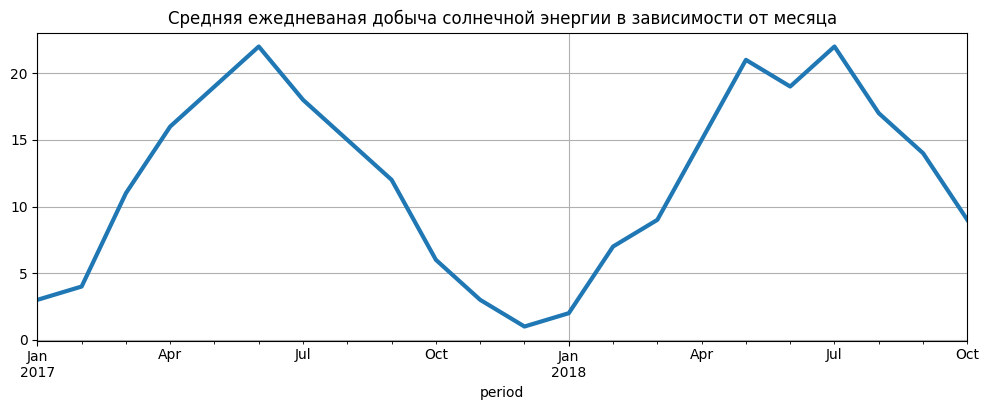

In [49]:
#import plotly.express as px

grouped_cases = round(solar_data.groupby('period')['day_power'].mean())
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Средняя ежедневаная добыча солнечной энергии в зависимости от месяца',
    grid = True,
    lw=3
)